<a href="https://colab.research.google.com/github/FernandoLuiz-web/Product-F-ller/blob/main/product_fuller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curva de Fuller:** Visualização e Comparação de Curvas de Tamanho de Partículas

Este notebook tem como objetivo gerar e comparar a curva teórica de Fuller com a curva literal baseada em dados reais de percentuais passantes de partículas. O método de Fuller é amplamente utilizado para determinar a distribuição ideal de partículas em misturas, como em argamassas, levando em consideração o tamanho das partículas e sua distribuição percentual.

Através deste processo, podemos:


1.   Gerar a curva teórica com base nos diâmetros das partículas informadas, utilizando a fórmula de Fuller para calcular o percentual de passante esperado em função do diâmetro das malhas.
2.   Comparar a curva teórica com a curva literal, utilizando dados de percentuais passantes fornecidos pelo usuário. Isso permite verificar a conformidade entre a distribuição ideal e a real.

Este notebook foi projetado para facilitar a análise de curvas de granulometria, sendo uma ferramenta útil para quem deseja avaliar a qualidade e consistência das misturas de materiais, como no caso das argamassas, e obter insights sobre o comportamento das partículas presentes na mistura.



In [71]:
try:
    import matplotlib.pyplot as plt
    import ipywidgets as widgets
    from IPython.display import display, Math, Markdown, clear_output
except ImportError as e:
    print(f"Erro ao importar: {e}")

from typing import List
from enum import Enum

# **Explicação Geral**
A classe ProductFullerProps é responsável por calcular a curva teórica de Fuller, que é uma representação gráfica usada para descrever a distribuição de tamanhos de partículas em um material, como areia ou outros agregados. Essa curva é importante para entender como as partículas se comportam em relação ao tamanho e a percentagem de material que passa por diferentes malhas de peneira.

**Funcionalidade**



1.   **Entrada dos Diâmetros das Partículas:** A classe recebe uma lista com os diâmetros das partículas (por exemplo, o tamanho das malhas de peneira) e armazena essa informação. Além disso, ela identifica o maior diâmetro na lista, que será utilizado para calcular a curva.
2.   **Cálculo da Curva de Fuller:** Usando os diâmetros das partículas e o maior diâmetro da lista, a classe calcula os percentuais de material que passariam por cada malha de peneira, segundo a fórmula de Fuller. Isso resulta em uma lista de valores que representam a distribuição teórica de passante para os diferentes tamanhos de partículas.
3. **Resultado:** O cálculo gera uma lista de percentuais de passante para cada diâmetro, mostrando como o material se comportaria em termos de distribuição de tamanho. Esses valores podem ser usados para comparar com dados reais e verificar se o material segue a distribuição teórica ou não.



# **Como Funciona?**

A fórmula de Fuller pode ser expressa como:

$$
P = 100 \times \left( \frac{d}{D} \right)^n
$$

1. Você fornece uma lista com os tamanhos das partículas.
2. A classe calcula o maior tamanho da partícula.
3. Ela usa esse maior tamanho para calcular a distribuição percentual de passante, gerando a curva teórica de Fuller.
4. O resultado é uma lista de percentuais que mostra como o material seria filtrado pelas diferentes malhas de peneira.

Essa abordagem é útil para verificar se a distribuição do material segue um padrão desejado e para entender melhor como as partículas se distribuem em termos de tamanho.

In [72]:
class ProductFullerProps:
    def __init__(self, particle_diameters: List[float]) -> None:
        """
        Args:
            particle_diameters (List[float]): Lista de diâmetros das partículas.
        """
        if not particle_diameters:
            raise ValueError("A lista de diâmetros de partículas não pode estar vazia.")
        self._particle_diameters = particle_diameters
        self._maximum_particle_diameter = max(particle_diameters)

    @property
    def particle_diameters(self) -> List[float]:
        return self._particle_diameters

    @property
    def maximum_particle_diameter(self) -> float:
        return self._maximum_particle_diameter

    def fuller_calc(self) -> List[float]:
        return [
            round((p_real / self.maximum_particle_diameter) ** 0.5 * 100, 1)
            for p_real in self.particle_diameters
        ]


### **Geração e Comparação de Curvas Teórica e Literal de Granulometria**

Este código implementa um sistema interativo utilizando widgets no **Google Colab** para gerar uma **curva teórica de Fuller** com base nos diâmetros de partículas fornecidos pelo usuário, e compará-la com uma **curva literal** (se disponível) calculada com os percentuais passantes informados.

O fluxo de operação é o seguinte:

1. **Seleção de Produto**: O usuário seleciona um tipo de produto, que pode ser uma das opções fornecidas no dropdown (Argamassas, Rejuntes ou Impermeabilizantes). Caso o produto não seja selecionado, o sistema aguarda essa escolha.

2. **Número de Peneiras**: O usuário é solicitado a informar o número de peneiras que deseja utilizar. Essa entrada define quantos diâmetros de partículas e percentuais passantes serão informados a seguir.

3. **Entrada de Diâmetros e Percentuais Passantes**: Com base no número de peneiras, o sistema gera campos para o usuário informar os **diâmetros** das partículas (em milímetros) e os **percentuais passantes** (se aplicável). Esses campos são atualizados dinamicamente quando o número de peneiras é alterado.

4. **Cálculo e Exibição da Curva**: Ao clicar no botão "Calcular", o código gera duas curvas:
   - **Curva Teórica (Curva de Fuller)**: Calculada com base nos diâmetros informados, utilizando a fórmula de Fuller para a distribuição granulométrica.
   - **Curva Literal (Passante)**: Caso o usuário tenha informado valores de percentuais passantes, essa curva é gerada e comparada com a curva teórica. Caso contrário, apenas a curva teórica será exibida.

### Objetivo
Este sistema permite que o usuário visualize a comparação entre a curva teórica de Fuller e os dados reais de granulometria fornecidos (curva literal), auxiliando em análises relacionadas à distribuição de partículas em produtos como argamassas, rejuntes e impermeabilizantes.


Dropdown(description='Escolha:', index=1, options=(('Escolha um tipo de produto', <Products.DEFAULT: 'Escolha …

IntText(value=0, description='Número de peneiras:', style=DescriptionStyle(description_width='initial'))

HBox()

Button(button_style='success', description='Calcular', style=ButtonStyle())

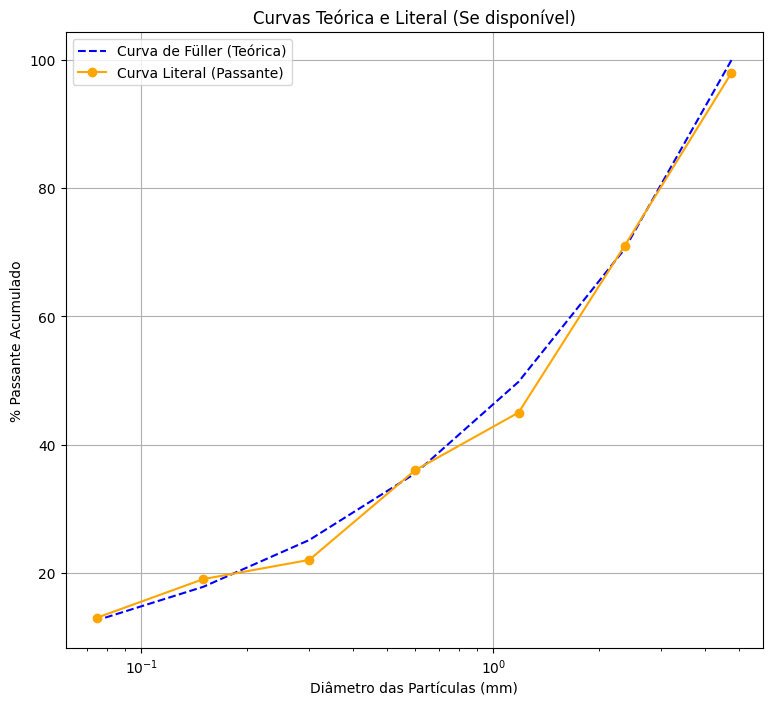

In [73]:
class Products(Enum):
    DEFAULT = "Escolha um tipo de produto"
    ARGAMASSAS = "ARGAMASSAS"
    REJUNTES = "REJUNTES"
    IMPERMEABILIZANTES = "IMPERMEABILIZANTES"

options = [(product.value, product) for product in Products]

dropdown = widgets.Dropdown(
    options=options,
    description="Escolha:",
    value=Products.DEFAULT,
    style={"description_width": "initial"}
)

peneiras_input = widgets.IntText(
    description="Número de peneiras:",
    style={"description_width": "initial"},
    value=0,
)

particle_inputs = widgets.HBox()

calculate_button = widgets.Button(
    description="Calcular",
    button_style="success",
)


def update_particle_inputs(change):
    n_peneiras = peneiras_input.value
    particle_widgets = [
        widgets.FloatText(
            description=f"Valor(mm) da Malha {i + 1} :", style={"description_width": "initial"}
        )
        for i in range(n_peneiras)
    ]

    passante_widgets = [
        widgets.FloatText(
            description=f"Valor % obtido em passante {i + 1}:", style={"description_width": "initial"}
        )
        for i in range(n_peneiras)
    ]

    particle_vbox = widgets.VBox(particle_widgets)
    passante_vbox = widgets.VBox(passante_widgets)

    particle_inputs.children = [particle_vbox, passante_vbox]

def on_dropdown_change(change):
    clear_output(wait=True)
    display(dropdown)
    if change["new"] == Products.DEFAULT:
        print("Escolha um tipo de produto.")
    else:
        display(peneiras_input, particle_inputs, calculate_button)

import matplotlib.pyplot as plt

def calculate_curve(_):
    try:
        diameters = [child.value for child in particle_inputs.children[0].children]
        passantes = [child.value for child in particle_inputs.children[1].children]

        if len(diameters) == 0:
            print("Adicione os diâmetros das partículas.")
            return

        products = ProductFullerProps(diameters)

        plt.figure(figsize=(9, 8))

        plt.plot(
            products.particle_diameters,
            products.fuller_calc(),
            linestyle="--",
            color="blue",
            label="Curva de Füller (Teórica)",
        )
        if all(passante > 0 for passante in passantes):
            plt.plot(
                diameters,
                passantes,
                marker="o",
                color="orange",
                label="Curva Literal (Passante)",
            )
        plt.title("Curvas Teórica e Literal (Se disponível)")
        plt.xlabel("Diâmetro das Partículas (mm)")
        plt.ylabel("% Passante Acumulado")
        plt.xscale("log")
        plt.yscale("linear")
        plt.grid(True)
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Erro: {e}")


dropdown.observe(on_dropdown_change, names="value")
peneiras_input.observe(update_particle_inputs, names="value")
calculate_button.on_click(calculate_curve)

display(dropdown)